<a href="https://colab.research.google.com/github/yeeeeeun/AI_software/blob/main/%EC%9E%85%EB%B9%84%EB%8C%80%EC%B9%AD%EC%9D%B8%EC%8B%9D%EB%AA%A8%EB%8D%B8_%EC%B5%9C%EC%A2%85%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import glob
import cv2
import numpy as np

def load_data(data_path, img_size=(128, 128)):
    images = []
    labels = []

    # Stroke 이미지 로드 및 레이블링
    for file in glob.glob(os.path.join(data_path, 'stroke_data', '*.jpg')):
        img = cv2.imread(file)
        img = cv2.resize(img, img_size)  # 이미지 리사이즈
        images.append(img)
        labels.append(1)  # Stroke 레이블: 1

    # Non-Stroke 이미지 로드 및 레이블링
    for file in glob.glob(os.path.join(data_path, 'noStroke_data', '*.jpg')):
        img = cv2.imread(file)
        img = cv2.resize(img, img_size)  # 이미지 리사이즈
        images.append(img)
        labels.append(0)  # Non-Stroke 레이블: 0

    return np.array(images), np.array(labels)

# 데이터 로드
data_path = '/content/drive/MyDrive/main'
images, labels = load_data(data_path)

print(f"Loaded {len(images)} images with labels.")


Loaded 3935 images with labels.


In [2]:
import dlib

def get_landmarks(image):
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)
    for face in faces:
        landmarks = predictor(gray, face)
        return landmarks
    return None


File downloaded successfully.


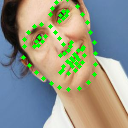

In [3]:
import os
import requests
import dlib
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# GitHub에서 파일 다운로드
url = 'https://github.com/GuoQuanhao/68_points/blob/master/shape_predictor_68_face_landmarks.dat?raw=true'
response = requests.get(url)
with open('shape_predictor_68_face_landmarks.dat', 'wb') as file:
    file.write(response.content)

print("File downloaded successfully.")


# 랜드마크 추출 및 이미지에 그리기
detector = dlib.get_frontal_face_detector()
predictor_path = 'shape_predictor_68_face_landmarks.dat'
predictor = dlib.shape_predictor(predictor_path)

def get_landmarks(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)
    for face in faces:
        landmarks = predictor(gray, face)
        return landmarks
    return None

def draw_landmarks(image, landmarks):
    for i in range(0, 68):
        x = landmarks.part(i).x
        y = landmarks.part(i).y
        cv2.circle(image, (x, y), 2, (0, 255, 0), -1)
    return image

# 예제: 첫 번째 이미지에 랜드마크 그리기
example_image = images[0].copy()
landmarks = get_landmarks(example_image)
if landmarks:
    example_image = draw_landmarks(example_image, landmarks)
    cv2_imshow(example_image)  # cv2.imshow 대신 사용
else:
    print("No landmarks detected.")


In [4]:
import os
import requests
import dlib
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# GitHub에서 파일 다운로드
url = 'https://github.com/GuoQuanhao/68_points/blob/master/shape_predictor_68_face_landmarks.dat?raw=true'
response = requests.get(url)
with open('shape_predictor_68_face_landmarks.dat', 'wb') as file:
    file.write(response.content)

print("File downloaded successfully.")

# 데이터 로드 함수
def load_data(data_path, img_size=(128, 128)):
    images = []
    labels = []

    for file in glob.glob(os.path.join(data_path, 'stroke_data', '*.jpg')):
        img = cv2.imread(file)
        img = cv2.resize(img, img_size)
        images.append(img)
        labels.append(1)

    for file in glob.glob(os.path.join(data_path, 'noStroke_data', '*.jpg')):
        img = cv2.imread(file)
        img = cv2.resize(img, img_size)
        images.append(img)
        labels.append(0)

    return np.array(images), np.array(labels)

# 데이터 로드
data_path = '/content/drive/MyDrive/main'
images, labels = load_data(data_path)

print(f"Loaded {len(images)} images with labels.")

# 랜드마크 추출 및 이미지에 그리기
detector = dlib.get_frontal_face_detector()
predictor_path = 'shape_predictor_68_face_landmarks.dat'
predictor = dlib.shape_predictor(predictor_path)

def get_landmarks(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)
    for face in faces:
        landmarks = predictor(gray, face)
        return landmarks
    return None

def calculate_asymmetry(landmarks):
    left_lip = (landmarks.part(48).x, landmarks.part(48).y)
    right_lip = (landmarks.part(54).x, landmarks.part(54).y)
    asymmetry = abs(left_lip[1] - right_lip[1])  # 좌표 차이 계산
    return asymmetry

# 비대칭성 계산 및 데이터셋 구축
X = []  # 특징 (비대칭성)
y = []  # 라벨 (0 또는 1)

for img, label in zip(images, labels):
    landmarks = get_landmarks(img)
    if landmarks:
        asymmetry = calculate_asymmetry(landmarks)
        X.append(asymmetry)
        y.append(label)

X = np.array(X).reshape(-1, 1)
y = np.array(y)

print(f"Feature shape: {X.shape}, Labels shape: {y.shape}")


File downloaded successfully.
Loaded 3935 images with labels.
Feature shape: (2281, 1), Labels shape: (2281,)


In [5]:
#import tensorflow as tf
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# CNN 모델 정의
#model = Sequential([
#    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
 #   MaxPooling2D((2, 2)),
  #  Conv2D(64, (3, 3), activation='relu'),
   # MaxPooling2D((2, 2)),
    #Flatten(),
  #  Dense(64, activation='relu'),
   # Dense(1, activation='sigmoid')
#])

#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       3,686,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,705,921 (14.14 MB)

 Trainable params: 3,705,921 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# 비대칭성 벡터를 추가적인 특징으로 모델에 포함하는 예시
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Concatenate

image_input = Input(shape=(128, 128, 3))
x = Conv2D(32, (3, 3), activation='relu')(image_input)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)

landmark_input = Input(shape=(1,))  # 비대칭성 값을 입력

# 이미지 특징과 비대칭성 값을 합침
x = Concatenate()([x, landmark_input])

x = Dense(64, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=[image_input, landmark_input], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 126, 126, 32)   │            896 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 63, 63, 32)     │              0 │ conv2d_2[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 61, 61, 64)     │         18,496 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 30, 30, 64)     │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 57600)          │              0 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_2             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 57601)          │              0 │ flatten_1[0][0],       │
│                           │                        │                │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 64)             │      3,686,528 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 1)              │             65 │ dense_2[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 3,705,985 (14.14 MB)

 Trainable params: 3,705,985 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
from sklearn.model_selection import train_test_split

# 비대칭성 계산 및 데이터셋 구축
X_images = []  # 이미지를 위한 입력 데이터
X_landmarks = []  # 비대칭성 값을 위한 입력 데이터
y = []  # 라벨

# 각 이미지에 대해 랜드마크를 추출하고 비대칭성 계산
for img, label in zip(images, labels):
    landmarks = get_landmarks(img)
    if landmarks:
        asymmetry = calculate_asymmetry(landmarks)
        X_images.append(img)
        X_landmarks.append(asymmetry)
        y.append(label)

X_images = np.array(X_images)
X_landmarks = np.array(X_landmarks).reshape(-1, 1)  # 비대칭성 값은 하나의 수치이므로 (n_samples, 1) 형태로 변환
y = np.array(y)

print(f"Feature shape: {X_images.shape}, Landmarks shape: {X_landmarks.shape}, Labels shape: {y.shape}")

# 첫 번째 분할: 80%는 훈련 데이터, 20%는 (테스트 + 검증 데이터)
X_train_img, X_temp_img, X_train_landmark, X_temp_landmark, y_train, y_temp = train_test_split(
    X_images, X_landmarks, y, test_size=0.2, random_state=42
)

# 두 번째 분할: 10%는 테스트 데이터, 10%는 검증 데이터
X_val_img, X_test_img, X_val_landmark, X_test_landmark, y_val, y_test = train_test_split(
    X_temp_img, X_temp_landmark, y_temp, test_size=0.5, random_state=42
)

# 데이터 분할 후 크기 확인
print(f"Train size: {X_train_img.shape[0]}")
print(f"Validation size: {X_val_img.shape[0]}")
print(f"Test size: {X_test_img.shape[0]}")

# 모델 학습
history = model.fit([X_train_img, X_train_landmark], y_train, epochs=10, batch_size=32, validation_data=([X_test_img, X_test_landmark], y_test))

# 학습된 모델 평가
test_loss, test_acc = model.evaluate([X_test_img, X_test_landmark], y_test)
print(f"Test Accuracy: {test_acc:.4f}")


Feature shape: (2281, 128, 128, 3), Landmarks shape: (2281, 1), Labels shape: (2281,)
Train size: 1824
Validation size: 228
Test size: 229
Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.5851 - loss: 80.0923 - val_accuracy: 0.7293 - val_loss: 0.5616
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7786 - loss: 0.4812 - val_accuracy: 0.7511 - val_loss: 0.4942
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8879 - loss: 0.2695 - val_accuracy: 0.7860 - val_loss: 0.5727
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9666 - loss: 0.1155 - val_accuracy: 0.7904 - val_loss: 0.6952
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9864 - loss: 0.0574 - val_accuracy: 0.7860 - val_loss: 0.7131
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9953 - loss: 0.0260 - val_accuracy: 0.7686 - val_loss: 0.9013
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9923 - loss: 0.0497 - val_accurac

In [11]:
# 모델 평가
loss, accuracy = model.evaluate(
    [X_test_img, X_test_landmark],  # 이미지와 비대칭성 벡터를 튜플로 전달
    y_test
)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8230 - loss: 0.5636
Test Loss: 0.5959703326225281
Test Accuracy: 0.8296943306922913


In [12]:
def draw_lip_landmarks(image, landmarks):
    # 입술 양 끝 좌표 추출
    left_lip = (landmarks.part(48).x, landmarks.part(48).y)
    right_lip = (landmarks.part(54).x, landmarks.part(54).y)

    # 이미지에 표시
    cv2.circle(image, left_lip, 3, (0, 255, 0), -1)
    cv2.circle(image, right_lip, 3, (0, 255, 0), -1)

    return image, left_lip, right_lip

In [33]:
from sklearn.metrics import classification_report

# 테스트 데이터로 예측
y_pred = model.predict([X_test_img, X_test_landmark])
y_pred = (y_pred > 0.4).astype(int)  # 0.4 기준으로 이진 분류

# 평가 지표 출력
print(classification_report(y_test, y_pred))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       125
           1       0.78      0.89      0.83       104

    accuracy                           0.84       229
   macro avg       0.84      0.84      0.84       229
weighted avg       0.85      0.84      0.84       229



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Asymmetry: 32
Prediction: 0.9895521998405457
뇌졸중 가능성 높음


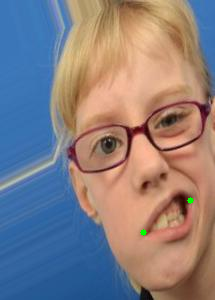

In [36]:
def predict_stroke(image_path):
    # 이미지 로드 및 전처리
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (128, 128))
    landmarks = get_landmarks(img)

    if landmarks:
        # 비대칭성 계산
        asymmetry = calculate_asymmetry(landmarks)

        # 비대칭성 값을 모델 입력에 맞게 확장
        landmark_input = np.array([[asymmetry]])

        # 이미지 데이터 확장
        img_resized = np.expand_dims(img_resized, axis=0)

        # 모델 예측
        prediction = model.predict([img_resized, landmark_input])[0][0]

        # 예측 결과 출력
        if prediction > 0.4:
            result = "뇌졸중 가능성 높음"
        else:
            result = "뇌졸중 가능성 낮음"

        print(f"Asymmetry: {asymmetry}")
        print(f"Prediction: {prediction}")
        print(result)

        # 이미지에 랜드마크 표시
        img_with_landmarks = draw_lip_landmarks(img, landmarks)[0]
        cv2_imshow(img_with_landmarks)
    else:
        print("No landmarks detected.")

# 예제 사용법
image_path = '/content/stroke_1_(3).jpg'  # 테스트 이미지 경로
predict_stroke(image_path)


In [37]:
# 모델 저장
model.save('/content/drive/MyDrive/f_stroke_prediction_model.h5')
print("Model saved successfully.")


Model saved successfully.
